### 2차원 이산형 확률변수의 정의

- 2차원 확률변수에서는 1차원 확률분포 2개(X,Y)를 동시에 다룬다.

- 각 확률변수가 취할 수 있는 값의 조합으로 이뤄진 집합과 그 확률에 의해 정의된다.

<br>

### 결합확률분포(Joint Probability Distribution)

- (X,Y)가 취할 수 있는 값의 조합으로 이뤄진 집합을 {(xi,yk)|i=1,2,...; j=1,2,...}

- 각각 조합에 맞는 확률(결합확률 분포)

   - P(X=xi, Y=yj) = pij(i=1,2,...; j=1,2,....)

   - P(X=x, Y=y) = fXY(x,y)가 되는 함수를 fxy(x,y)를 결합함수라고 한다

- 즉, 동시에 움직이는 확률

- 확률의 성질

   - fxy(xi,yi) >= 0

   - sumi,j of fxy(xi,yi) = 1 


### 주변확률분포(Marginal Probability Distribution

- 확률변수(X,Y)가 결합분포에 의해 동시에 정의되었음에도(fXY(xi,yj))개별 확률변수 X의 확률분포(fX(x))만을 다시 살펴보아야할 떄 사용한다.

- 식

   - fX(x) = sum of fXY(x,yk)
   



### 2차원 이산형 확률변수 지표

 #### 기대값

 - 구하는 방식은 1차원과 거의 유사

 - 계산식

    - E(X) = sum of xifXY(xi,yj)

- 일반화: 일반적인 g(X,Y)의 기대값 정의

   - E(g(X,Y)) = sum of g(xi,yj)fXY(xi,yj)

- 기대값의 선형성

- a,b를 실수 X,Y를 확률변수라고 하면, E(aX+bY) = aE(X) + bE(Y)성립

<br>

#### 분산

- 1차원의 경우 거의 동일하다.

- 계산식

   - V(X) = sum of (xi-E(X))^2fXY(xi,yj)

- 분산의 일반화

- X 와 Y의 함수 g(X,Y)의 분산식

   - V(g(X,Y))= sum of (g(xi,yj)-E(g(X,Y)))^2fXY(xi,yj)






### 공분산

- 공분산 사용시 X,Y 사이에 어느정도 상관관계가 있는지 알 수 있다.

- 식

   - Cov(X,Y) = sum of (xi-E(X))(yj-E(Y))fXY(xi,yj)









In [23]:
import numpy as np
import matplotlib.pyplot as plt
%precision 3
%matplotlib inline

In [24]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

def f_XY(x,y):
    if 1<=y<=6 and 1<=x<=y<=6:
        return y * (x-y) / 441
    else:
        return 0


In [25]:



XY = [x_set, y_set, f_XY]

In [26]:

prob = np.array(
    [
         [
            
             f_XY(x_i, y_j)
             for y_j in y_set


         ]
         for x_i in x_set        
    ]

)

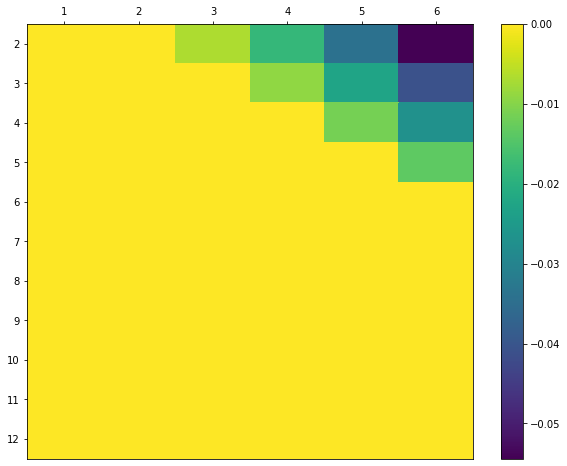

In [27]:




fig  = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor = False)
ax.set_yticklabels(np.arange(2,13), minor = False)

#y축을 내림차순의 숫자가 되도록 아래를 반환한다.
ax.invert_yaxis()

#x축 눈금을 그래프 위쪽에 표시

ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [28]:
np.all(prob >=0)


False

In [29]:
np.sum(prob)

-0.238

In [30]:

#주변확률분포 정의
def f_X(x):
    return np.sum(
        [
         f_XY(x,y_k)
         for y_k in y_set
        ]
    )

In [31]:
def f_Y(y):
    return np.sum(
        [
         f_XY(x_k, y)
         for x_k in x_set
        ]
    )

In [32]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [33]:

prob_x = np.array(
    [
      f_X(x_k)
      for x_k in x_set
    ]
)

prob_y = np.array(
    [
      f_Y(y_k)
      for y_k in y_set
    ]
)

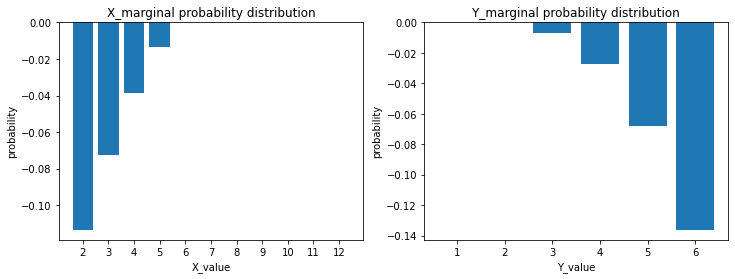

In [34]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [35]:
##2차원 확률변수지표
#기대값 구현

np.sum(
    [
     x_i * f_XY(x_i, y_j)
     for x_i in x_set
     for y_j in y_set
     
    ]
)

-0.667

In [36]:
#일반적인 기대값

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum(
        [
         g(x_i, y_j) * f_XY(x_i, y_j)
         for x_i in x_set
         for y_j in y_set
        ]
    )

In [37]:
mean_X = E(XY, lambda x, y:x)
mean_X

-0.667

In [38]:
mean_Y = E(XY, lambda x, y:y)
mean_Y

-1.286

In [39]:
a,b =2,3


In [40]:
E(XY, lambda x, y: a*x + b*y)

-5.190

In [41]:
a*mean_X + b * mean_Y

-5.190

In [42]:
#2차원 변수
#분산

np.sum(
    [
     (x_i-mean_X)**2 * f_XY(x_i, y_j)
     for x_i in x_set
     for y_j in y_set
    ]
)

-3.058

In [43]:
#분산의 일반화

def V(XY,g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum(
        [
         (g(x_i,y_j)-mean)**2 * f_XY(x_i,y_j)
         for x_i in x_set
         for y_j in y_set
        ]
    )

In [44]:
var_X = V(XY, g=lambda x, y:x)
var_X

-3.058

In [45]:
var_Y = V(XY, g=lambda x, y:y)
var_Y

-10.795

In [48]:
def COV(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y:x)
    mean_Y = E(XY, lambda x, y:y)
    return np.sum(
        [
         (x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i,y_j)
         for x_i in x_set
         for y_j in y_set
        ]
    )

In [49]:
cov_xy = COV(XY)
cov_xy

-5.569

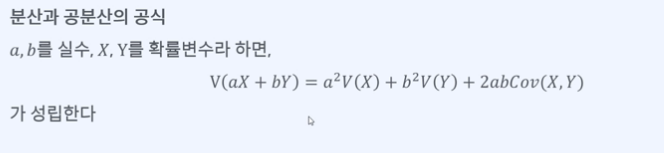

In [50]:
#V(2X+3Y) = 4V(X) + 9V(Y) + 12Cov(X,Y)

V(XY, lambda x, y: 2*x + 3*y)

-176.217

In [52]:
2**2 * var_X + 3**2 * var_Y + 2*2*3 * cov_xy

-176.217

In [53]:
#상관계수

#pxy = p(X,Y) =  VXY / (VX * VY)

cov_xy / np.sqrt(var_X *  var_Y)

-0.969